Task 1: Data Loading and Exploration
python

In [72]:
import pandas as pd
df = pd.read_csv('customer_churn_data.csv')
df = df.dropna()
df.info()
df.shape
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            10000 non-null  object 
 1   age                    10000 non-null  int64  
 2   gender                 10000 non-null  object 
 3   senior_citizen         10000 non-null  int64  
 4   partner                10000 non-null  object 
 5   dependents             10000 non-null  object 
 6   tenure                 10000 non-null  int64  
 7   phone_service          10000 non-null  object 
 8   multiple_lines         10000 non-null  object 
 9   internet_service       10000 non-null  object 
 10  online_security        10000 non-null  object 
 11  online_backup          10000 non-null  object 
 12  device_protection      10000 non-null  object 
 13  tech_support           10000 non-null  object 
 14  streaming_tv           10000 non-null  object 
 15  str

,age,senior_citizen,tenure,monthly_charges,total_charges,customer_satisfaction,support_calls
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,44.662500,0.092300,22.216800,53.640204,1192.146321,3.399300,2.007400
std,14.397976,0.289463,19.963232,17.047669,1193.960345,1.069193,1.415184
min,18.000000,0.000000,1.000000,20.050000,20.320000,1.000000,0.000000
25%,34.000000,0.000000,6.000000,40.407500,306.305000,3.000000,1.000000
50%,44.000000,0.000000,16.000000,51.770000,796.955000,3.000000,2.000000
75%,55.000000,0.000000,33.000000,66.280000,1681.077500,4.000000,3.000000
max,80.000000,1.000000,72.000000,111.810000,7078.800000,5.000000,9.000000


Task 2: Exploratory Data Analysis

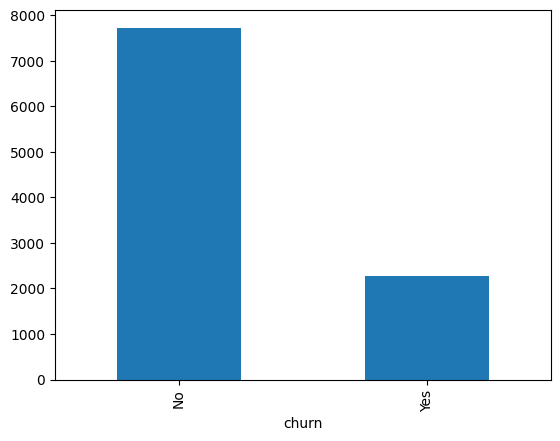

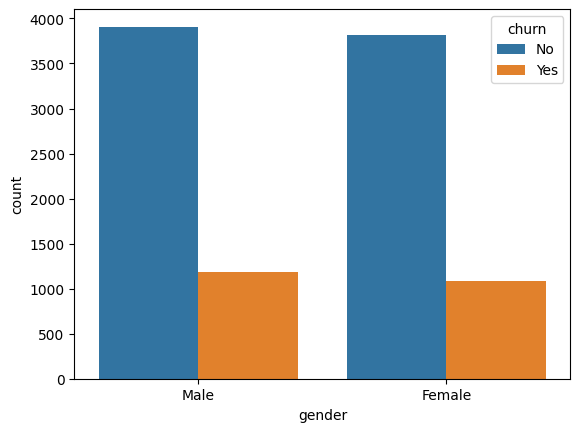

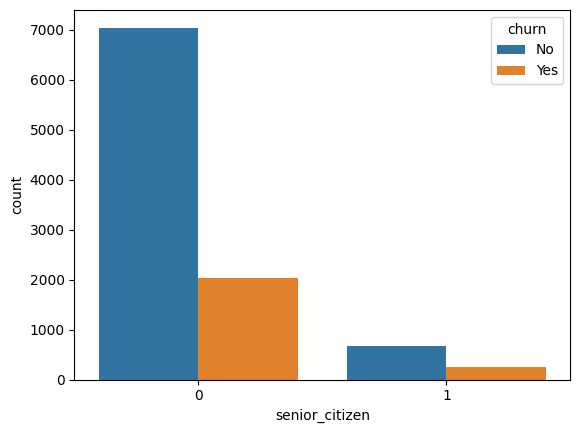

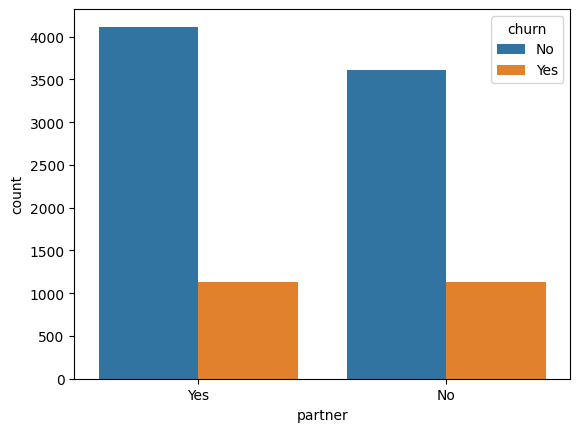

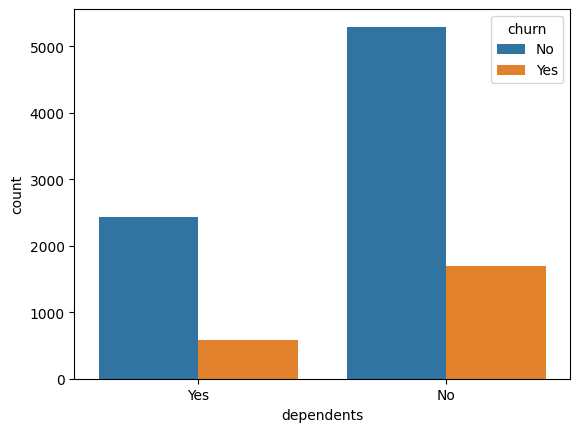

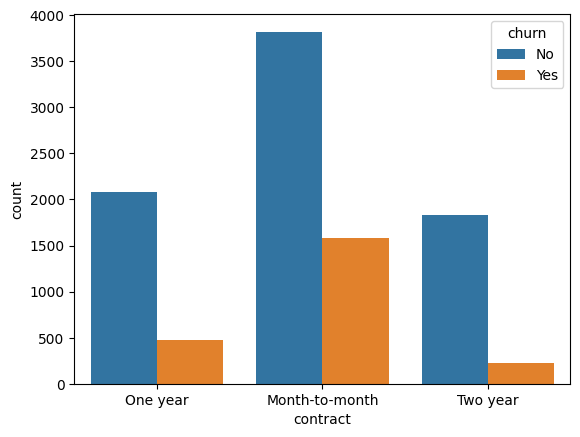

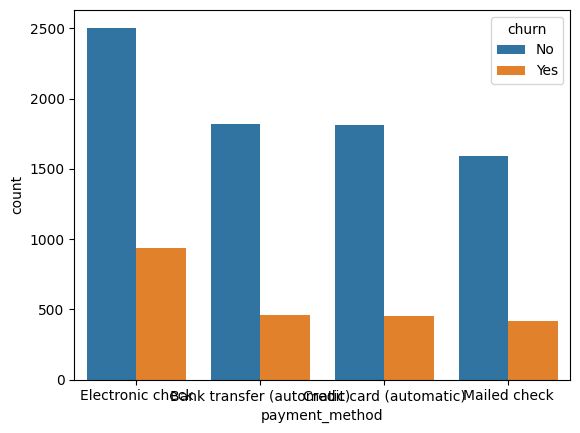

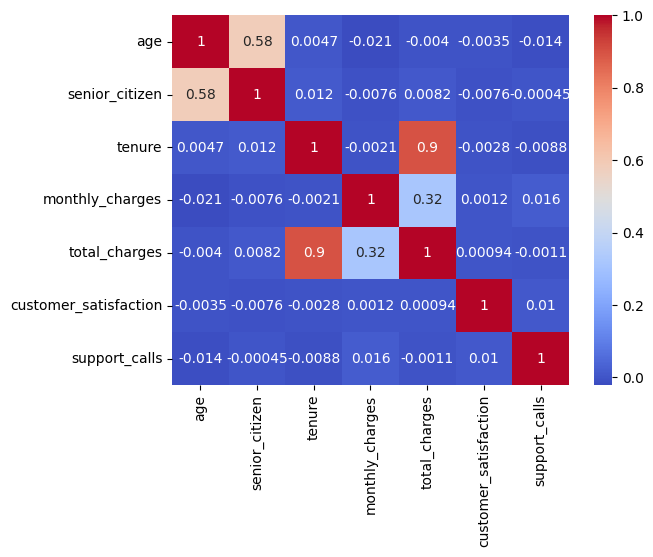

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
df['churn'].value_counts().plot(kind='bar')
plt.show()
df['churn'].value_counts(normalize=True)
sns.countplot(x='gender', hue='churn', data=df)
plt.show()
sns.countplot(x='senior_citizen', hue='churn', data=df)
plt.show()
sns.countplot(x='partner', hue='churn', data=df)
plt.show()
sns.countplot(x='dependents', hue='churn', data=df)
plt.show()
sns.countplot(x='contract', hue='churn', data=df)
plt.show()
sns.countplot(x='payment_method', hue='churn', data=df)
plt.show()
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()


Task 3: Data Preprocessing

In [74]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

y = df['churn'].map({'Yes':1,'No':0})
X = df.drop('churn', axis=1)

for c in X.columns:
    if pd.api.types.is_interval_dtype(X[c]):
        X[c] = X[c].astype(str)
    if X[c].dtype == 'object':
        X[c] = LabelEncoder().fit_transform(X[c])

scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


C:\Users\Mohit\AppData\Local\Temp\ipykernel_18736\3669777712.py:8: DeprecationWarning: is_interval_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.IntervalDtype)` instead
  if pd.api.types.is_interval_dtype(X[c]):
C:\Users\Mohit\AppData\Local\Temp\ipykernel_18736\3669777712.py:8: DeprecationWarning: is_interval_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.IntervalDtype)` instead
  if pd.api.types.is_interval_dtype(X[c]):
C:\Users\Mohit\AppData\Local\Temp\ipykernel_18736\3669777712.py:8: DeprecationWarning: is_interval_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.IntervalDtype)` instead
  if pd.api.types.is_interval_dtype(X[c]):
C:\Users\Mohit\AppData\Local\Temp\ipykernel_18736\3669777712.py:8: DeprecationWarning: is_interval_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.IntervalDtype)` instead
  if pd.api.types.is_interval_d

((8000, 23), (2000, 23))

Task 4: Model Development

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC()
}

for n in models:
    models[n].fit(X_train, y_train)

list(models.keys())


['LogisticRegression', 'DecisionTree', 'RandomForest', 'SVM']

Task 5: Model Evaluation

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
results = {}
for n, m in models.items():
    yp = m.predict(X_test)
    results[n] = [
        accuracy_score(y_test, yp),
        precision_score(y_test, yp),
        recall_score(y_test, yp),
        f1_score(y_test, yp),
        confusion_matrix(y_test, yp)
    ]
pd.DataFrame(results, index=['Accuracy','Precision','Recall','F1','ConfusionMatrix']).T


,Accuracy,Precision,Recall,F1,ConfusionMatrix
LogisticRegression,0.782,0.594771,0.195699,0.294498,"[[1473, 62], [374, 91]]"
DecisionTree,0.6775,0.311715,0.32043,0.316013,"[[1206, 329], [316, 149]]"
RandomForest,0.7775,0.570423,0.174194,0.266886,"[[1474, 61], [384, 81]]"
SVM,0.7765,0.6125,0.105376,0.179817,"[[1504, 31], [416, 49]]"
